# **1. Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import time
import warnings

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [11]:
data_covid = pd.read_csv("/content/drive/MyDrive/Study Independent/Machine Learning - DBS FOUNDATION/9. Machine Learning untuk Pemula/proyek ML /covid_inverse.csv")

In [4]:
data_covid.head(5)

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Island,Population,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Cluster
0,2.0,0.0,0.0,2.0,41.0,20.0,75.0,-54.0,Jawa,5.345298,2.032821e+06,-3.529700,3006.040499,-0.131017,1277.004067,0.140814,0.815143,1.214833,0
1,2.0,0.0,0.0,2.0,43.0,20.0,75.0,-52.0,Jawa,5.345298,2.032821e+06,-3.529323,3006.040499,-0.131017,1226.099028,0.131753,0.815143,1.214833,0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Sumatera,3.222783,1.989004e+06,-3.537292,3006.040499,-0.134227,183.106354,0.052519,-1.046865,1.214833,0
3,2.0,0.0,0.0,2.0,45.0,20.0,75.0,-50.0,Jawa,5.345298,2.032821e+06,-3.528924,3006.040499,-0.131017,1179.679014,0.123502,0.815143,1.214833,0
4,1.0,0.0,0.0,1.0,2.0,1.0,60.0,-59.0,Jawa,8.920180,1.993872e+06,-3.537544,3006.040499,-0.134192,1304.362722,3.140106,0.815143,-0.129836,0


In [14]:
# Label Encoding pada kolom Island
label_encoder = LabelEncoder()
data_covid['Island'] = label_encoder.fit_transform(data_covid['Island'])


# **3. Data Splitting**

In [15]:
X = data_covid.drop(columns=["Cluster"])
y = data_covid["Cluster"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [17]:
# Untuk Decission Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Untuk Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

## **b. Evaluasi Model Klasifikasi**

In [23]:
def metrik(y_test, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro')
    }

hasil_metrik = pd.DataFrame([
    metrik(y_test, y_pred_dt, "Decision Tree"),
    metrik(y_test, y_pred_rf, "Random Forest")
])

hasil_metrik


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.977492,0.972400,0.971633,0.972001
1,Random Forest,0.989751,0.987943,0.986310,0.987121


Hasil Evaluasi pada algoritma Decision Tree dan Random Forest memperlihatkan bahwa peforma yang sangat baik karena akurasi dan F1-Score diatas 92%.

Lalu, Random forest memiliki score metrics yang lebih tinggi dibanginkan Decision Tree

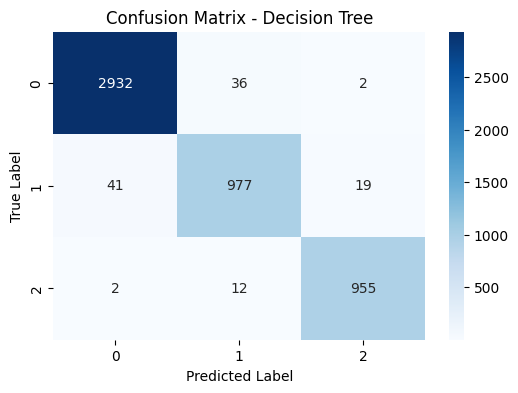

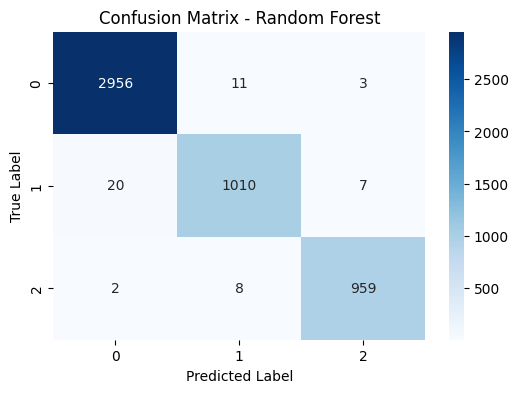

In [27]:
# Buat confusion matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Buat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot Confusion Matrix untuk kedua model
plot_confusion_matrix(cm_dt, "Decision Tree")
plot_confusion_matrix(cm_rf, "Random Forest")

1. Confusion Matric pada Decision Tree
- True Label 0 = Model yang diprediksi benar sebanyak 2931, lalu terdapat 36 data yang salah prediksi yang harus 0 jadi 1. Selain itu juga terdapat 2 data yang harusnya 0 menjadi 2

- True Label 1 = Model yang diprediksi benar sebagai 1 adalah 977. Namun terdapat kesalahan prediksi sebanyak 41 data menjadi 0, dan kesalahan prediksi 19 data jadi 2

- True Label 2 = Model yang benar diprediksi hanya 955 data. Sedangkan terdapat 12 data jadi 1 dan 2 menjadi 0

2. Confudion Matrics pada Random Forest
- True Label 0 = Terdapat 2956 data yang benar diprediksi sbagai 0. Lalu, Terdapat 11 data yang salah prediksi yang harus nya 0 menjadi 1, sedangkan terdapat 3 data yang diprediksi menjadi 2

- True Label 1 = Terdapat 1010 data yang diprediksi benar menjadi 1, sedangkan terdapat 20 data yang diprediksi salah menjadi 0. dan terdapat 7 data yang diprediksi salah menjadi 2

- True Label 2 = Terdapat 959 data yang diprediksi benar menjadi 2, namun terdapat 2 data yang salah karena diprediksi sebagai 0, sedangkan data yang diprediksi salah sebagai 1

## **c. Tuning Model Klasifikasi (RandomizedSearchCV)**

---



In [42]:
# Parameter
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random'],
}

# Untuk inisialiasi
random_search = RandomizedSearchCV(
    estimator=dt_model, param_distributions=param_dist,
    n_iter=5, cv=3, n_jobs=-1, verbose=2, random_state=42
)

# Mencatat waktu mulai
start_time = time.time()

# fit kan model
random_search.fit(X_train, y_train)

# Output
print(f"Best parameters (Randomized Search): {random_search.best_params_}")
best_dt_random = random_search.best_estimator_

# Evaluasi
y_pred_random_dt = best_dt_random.predict(X_test)
random_search_mse = mean_squared_error(y_test, y_pred_random_dt)
print(f"MSE after Randomized Search: {random_search_mse:.2f}")

# Mencatat waktu selesai
end_time = time.time()
execution_time = end_time - start_time  # Menghitung selisih waktu
print(f"Waktu eksekusi: {execution_time:.4f} detik")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters (Randomized Search): {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'criterion': 'entropy'}
MSE after Randomized Search: 0.03
Waktu eksekusi: 4.7785 detik


In [43]:
# Parameter
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],

}

# Untuk inisialiasi
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_dist,
    n_iter=5, cv=3, n_jobs=-1, verbose=2, random_state=42
)

# Mencatat waktu mulai
start_time = time.time()

# Fit ka model
random_search.fit(X_train, y_train)

# Output
print(f"Best parameters (Randomized Search): {random_search.best_params_}")
best_dt_random = random_search.best_estimator_

# Evaluasi
y_pred_random_rf = best_dt_random.predict(X_test)
random_search_mse = mean_squared_error(y_test, y_pred_random_rf)
print(f"MSE after Randomized Search: {random_search_mse:.2f}")

# Mencatat waktu selesai
end_time = time.time()
execution_time = end_time - start_time  # Menghitung selisih waktu
print(f"Waktu eksekusi: {execution_time:.4f} detik")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters (Randomized Search): {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'}
MSE after Randomized Search: 0.01
Waktu eksekusi: 89.6869 detik


Hasil Model Tuning

1. Decision Tree:
-  Hasil MSE nya adalah 0.03 bahwa model memiliki akurasi yang baik dengan kesalahan prediksi yang rendah
- Hasil eksekusi adalah 1.39 detik

2. Random Forest:
- Hasil MSE adalah 0.01 menunjukan akurasi yag sangat tinggi dan kesalahn prediksi sangat rendah
- Hasil eksekusi adalah 89.68 detik

3. Kesimpulan:
- Random Forest menunjukan akurasi yang lebih bai dibandingkan random forest, namun waktu eksekusi nya yang lebih lama

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [49]:
# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_random_dt)
precision_dt = precision_score(y_test, y_pred_random_dt, average='macro')  # Ganti 'binary' dengan 'micro', 'macro', atau 'weighted' jika diperlukan
recall_dt = recall_score(y_test, y_pred_random_dt, average='macro')  # Sama seperti precision
f1_dt = f1_score(y_test, y_pred_random_dt, average='macro')  # Sama seperti precision



In [48]:
# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_random_rf)
precision_rf = precision_score(y_test, y_pred_random_rf, average='macro')  # Ganti 'binary' dengan 'micro', 'macro', atau 'weighted' jika diperlukan
recall_rf = recall_score(y_test, y_pred_random_rf, average='macro')  # Sama seperti precision
f1_rf = f1_score(y_test, y_pred_random_rf, average='macro')  # Sama seperti precision


In [64]:
# Membuat DataFrame
data = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'Precision': [precision_dt, precision_rf],
    'Recall': [recall_dt, recall_rf],
    'F1-Score': [f1_dt, f1_rf]
}

df_evaluasi = pd.DataFrame(data)

# Menampilkan DataFrame
print(df_evaluasi)

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.977894   0.974059  0.970026  0.972016
1  Random Forest  0.991760   0.990788  0.988523  0.989645


Hasil evaluasi setelah tunning model adalah Random Forest memiliki score yang paling baik

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [65]:
before_tunning = hasil_metrik.copy()
after_tunning = df_evaluasi.copy()

In [66]:
perbandingan = before_tunning.merge(after_tunning, on="Model", suffixes=('_Before', '_After'))

In [74]:
perbandingan

,Model,Accuracy_Before,Precision_Before,Recall_Before,F1-Score_Before,Accuracy_After,Precision_After,Recall_After,F1-Score_After
0,Decision Tree,0.977492,0.972400,0.971633,0.972001,0.977894,0.974059,0.970026,0.972016
1,Random Forest,0.989751,0.987943,0.986310,0.987121,0.991760,0.990788,0.988523,0.989645


- Random Forest Secara konsisten menunjukan hasil yang lebih baik di setiap metrik evaluasi, baik sebelum tunning atau sesudahnya. Perubahan tunning pada kedua algoritma atau model mengalami peningkatan

- Dari keseluruhan analisis, Random Forest memiliki kinerja yang lebih baik dalam semua metrik.

- Walaupun Random Forest memiliki kinerja yang baik, namun proses eksekusi random forest jauh lebih lambat dibandingkan dengan Decision Tree

In [77]:
# Prediksi data latih pada kedua algoritma
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_rf = rf_model.predict(X_train)
hasil_metrik_train_dt = metrik(y_train, y_train_pred_dt, "Decision Tree (Train)")
hasil_metrik_train_rf = metrik(y_train, y_train_pred_rf, "Random Forest (Train)")

# Buat df
hasil_metrik_train = pd.DataFrame([hasil_metrik_train_dt, hasil_metrik_train_rf])
print("Hasil Evaluasi pada Data Latih:")
print(hasil_metrik_train)


Hasil Evaluasi pada Data Latih:
                   Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree (Train)       1.0        1.0     1.0       1.0
1  Random Forest (Train)       1.0        1.0     1.0       1.0


In [78]:
# Prediksi data uji pada kedua algoritma
hasil_metrik_test_dt = metrik(y_test, y_pred_dt, "Decision Tree (Test)")

hasil_metrik_test_rf = metrik(y_test, y_pred_rf, "Random Forest (Test)")

# buat df
hasil_metrik_test = pd.DataFrame([hasil_metrik_test_dt, hasil_metrik_test_rf])
print("Hasil Evaluasi pada Data Uji:")
print(hasil_metrik_test)


Hasil Evaluasi pada Data Uji:
                  Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree (Test)  0.977492   0.972400  0.971633  0.972001
1  Random Forest (Test)  0.989751   0.987943  0.986310  0.987121


In [79]:
# gabungan
hasil_metrik_gabung = pd.concat([hasil_metrik_train, hasil_metrik_test], ignore_index=True)
print("Hasil Evaluasi Gabungan:")
print(hasil_metrik_gabung)


Hasil Evaluasi Gabungan:
                   Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree (Train)  1.000000   1.000000  1.000000  1.000000
1  Random Forest (Train)  1.000000   1.000000  1.000000  1.000000
2   Decision Tree (Test)  0.977492   0.972400  0.971633  0.972001
3   Random Forest (Test)  0.989751   0.987943  0.986310  0.987121


Decision Tree menunjukan adanya overfitting karena adanya perbedaan nilai antara data latih dan data uji. Peforma pada data uji sedikit lebih rendah

Random Forest menunjukan overfitting, karena peforma pada data uji lebih sedikit dibandigkan dengan data latih

Data overfitting, pada Random Forst dapat diatur menggunakan max_depth untuk mengatur kedalam sebuah pohon, lalu pada Random Forest dapat mengatur n_estimamtor nya. Selain itu, dapat menggunakan teknik Cross Validation, dan melakukan data preprocessing secara ulang. Bahkan dapat menggunakan algoritma lain untuk modelling